In [1]:
# !python parallelosaurus.py

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import interp1d
import matplotlib as mpl
import glob

In [3]:
df = pd.read_csv("minisaurus_parallel.csv").fillna(0).drop(columns=['model_number', 'gyre_fn', 'num_zones', 
                                                                    'priority','star_age', 'num_retries','num_iters'])
df.columns

Index(['log_dt', 'star_mass', 'log_LH', 'log_LHe', 'log_LZ', 'log_Lnuc', 'pp',
       'cno', 'tri_alpha', 'he_core_mass', 'log_Teff', 'logL', 'log_R',
       'log_g', 'surf_avg_omega_div_omega_crit', 'surf_avg_v_rot',
       'log_cntr_P', 'log_cntr_Rho', 'log_cntr_T', 'center_h1', 'center_he4',
       'average_h1', 'average_he4', 'total_mass_h1', 'total_mass_he4',
       'dnu_muhz', 'profile_number', 'Myr', 'm', 'z', 'v', 'tr_num', 'density',
       'teff', 'n1ell0m0', 'n2ell0m0', 'n3ell0m0', 'n4ell0m0', 'n5ell0m0',
       'n6ell0m0', 'n7ell0m0', 'n8ell0m0', 'n9ell0m0', 'n10ell0m0', 'n1ell1m0',
       'n2ell1m0', 'n3ell1m0', 'n4ell1m0', 'n5ell1m0', 'n6ell1m0', 'n7ell1m0',
       'n8ell1m0', 'n9ell1m0', 'n10ell1m0', 'Dnu', 'eps', 'n1ell1dfreq',
       'n2ell1dfreq', 'n3ell1dfreq', 'n4ell1dfreq', 'n5ell1dfreq',
       'n6ell1dfreq', 'n7ell1dfreq', 'n8ell1dfreq', 'n9ell1dfreq',
       'n10ell1dfreq'],
      dtype='object')

In [4]:
m = 1.7
z = 0.026
v = 0.0
dff = df.query(f"m=={m} and z=={z}")

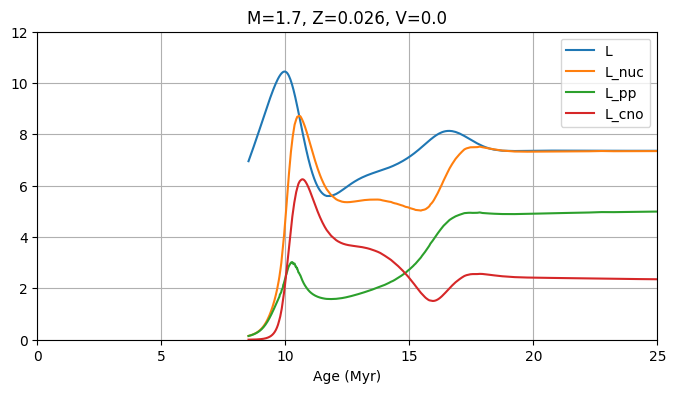

In [5]:
plt.figure(figsize=(8, 4))
plt.plot(dff["Myr"], 10**dff["logL"], label="L")
plt.plot(dff["Myr"], 10**dff["log_Lnuc"], label="L_nuc")
plt.plot(dff["Myr"], 10**dff["pp"], label="L_pp")
plt.plot(dff["Myr"], 10**dff["cno"], label="L_cno")
# plt.plot(dff["Myr"], dff["log_R"], label="log_R")
# plt.plot(dff["Myr"], dff["log_cntr_Rho"], label="log_cntr_Rho")
plt.grid()
plt.xlabel("Age (Myr)")
plt.xlim(0, 25)
plt.legend()
plt.ylim(0, 12)
plt.title(f"M={m}, Z={z}, V={v}")
plt.show()

In [6]:
hist = pd.read_csv(f"test_1.7_z/m{m}_z{z}_v0/LOGS/history.data", skiprows=5, delim_whitespace=True)
profile_index = pd.read_csv(f"test_1.7_z/m{m}_z{z}_v0/LOGS/profiles.index", skiprows=1, 
                            names=['model_number', 'priority', 'profile_number'], delim_whitespace=True)

profiles = []
ages = []
old = 0
for i, row in hist.iterrows():
    age = row.star_age/1e6
    new = int(age) + int(age * 10) % 10
    hist_model = row.model_number
    profile_model = profile_index.query(f"model_number=={row.model_number}").model_number.values
    if len(profile_model) !=0:
        profile_model = profile_model[0]
        if hist_model == profile_model:
            profile_number = profile_index.query(f"model_number=={row.model_number}").profile_number.values[0]
            if new > old:
                ages.append(age)
                profiles.append(pd.read_csv(f"test_1.7_z/m{m}_z{z}_v0/LOGS/profile{profile_number}.data", skiprows=5, delim_whitespace=True))
                old = new

In [6]:
profiles[0].columns

Index(['zone', 'mass', 'logR', 'logT', 'logRho', 'logP', 'x_mass_fraction_H',
       'y_mass_fraction_He', 'z_mass_fraction_metals', 'pp', 'cno',
       'tri_alpha', 'omega', 'brunt_N2', 'lamb_S'],
      dtype='object')

In [8]:
def plot_2d(args):
    age, profile = args
    palette = sns.color_palette("flare", len(profile))
    theta = np.linspace(0, 2*np.pi, 100)  # 100 points evenly spaced from 0 to 2*pi
    radius_max = 10**profile.logR.max()
    for i, row in profile.iterrows():
        radius = 10**row.logR
        # Convert 1D values to 2D Cartesian coordinates
        x = radius * np.cos(theta)
        y = radius * np.sin(theta)
        plt.plot(x, y, lw=1, color=palette[i])
    r = 5
    plt.xlim(-r, r)
    plt.ylim(-r, r)
    plt.title(f"Age: {age:.2f} Myr")


In [9]:
from matplotlib.animation import FuncAnimation, PillowWriter

fig = plt.figure(figsize=(6, 6))
ani = FuncAnimation(fig, plot_2d, frames=zip(ages, profiles), repeat=False)
ani.save(f'figures/2d.gif', writer='pillow', dpi=300)

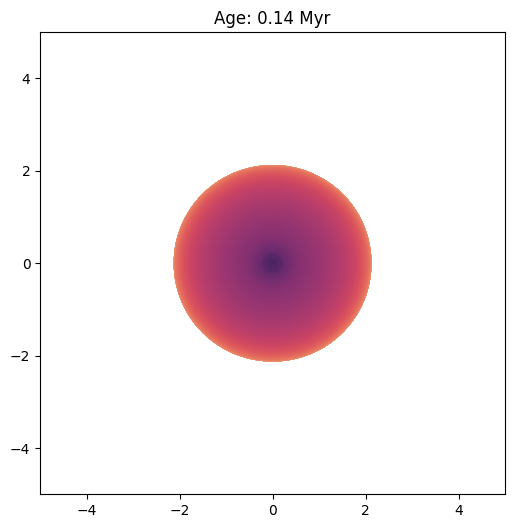

In [35]:
import time
from IPython import display

with plt.ion():
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111)
    for i, profile in enumerate(profiles):
        try:
            plt.cla()
            palette = sns.color_palette("flare", len(profile))
            plot_2d(profile, palette)
            # plt.colorbar(10**profile.logRho, label='Density')
            r = 5
            plt.xlim(-r, r)
            plt.ylim(-r, r)
            plt.title(f"Age: {ages[i]:.2f} Myr")
            display.display(plt.gcf())
            display.clear_output(wait=True)
            # time.sleep(0.1)
        except KeyboardInterrupt:
            break

In [15]:
1.349%10

1.349

In [ ]:
ages = np.arange(0, 40, 0.01)

dfs = []
for tr_num in range(6):
    this_df = df[df.tr_num == tr_num]
    this_df = this_df.groupby('Myr').mean().reset_index()
    new_df = pd.DataFrame()
    new_df['Myr'] = ages
    for col in this_df.columns:
        if col not in ['Myr', 'tr_num', 'm', 'v', 'z']:
            f = interp1d(this_df.Myr, this_df[col], kind='cubic', fill_value='extrapolate')
            new_df[col] = f(ages)
    dfs.append(new_df)


In [ ]:
cols0 = ['n1ell0m0', 'n2ell0m0', 'n3ell0m0',
       'n4ell0m0', 'n5ell0m0', 'n6ell0m0', 'n7ell0m0', 'n8ell0m0', 'n9ell0m0',
       'n10ell0m0']

cols1 = ['n1ell1m0', 'n2ell1m0', 'n3ell1m0', 'n4ell1m0',
         'n5ell1m0', 'n6ell1m0', 'n7ell1m0', 'n8ell1m0', 'n9ell1m0', 'n10ell1m0']

df_ref = dfs[0]
mean_diffs = []
ages = []
var_samples = np.round(np.append(np.arange(0.1, 1.4, 0.3), [1.25]), 3)

for this_df in dfs:
    this_mean = []
    age = []
    for i, row in this_df.iterrows():
        freqs_alt_0 = row[cols0]
        freqs_alt_1 = row[cols1]
        freqs_ref_0 = this_df.iloc[i][cols0]
        freqs_ref_1 = this_df.iloc[i][cols1]
        diff_0 = ((freqs_ref_0 - freqs_alt_0)/freqs_ref_0)
        diff_1 = ((freqs_ref_1 - freqs_alt_1)/freqs_ref_1)
        this_mean.append(np.mean( np.append(diff_0, diff_1) ))
        age.append(row["Myr"])
        if row["Myr"] > 40:
            break
    ages.append(age)
    mean_diffs.append(this_mean)

In [ ]:
fig = plt.figure(figsize=(15, 10))
palette = sns.color_palette("viridis", len(var_samples))
# palette = sns.color_palette("colorblind", len(var_samples))
linestyle_tuple = [
     ('dotted',                (0, (1, 1))),
     ('densely dotted',        (0, (1, 1))),
     ('long dash with offset', (5, (10, 3))),
     ('dashed',                (0, (5, 5))),
     ('densely dashed',        (0, (5, 1))),

     ('dashdotted',            (0, (3, 5, 1, 5))),
     ('densely dashdotted',    (0, (3, 1, 1, 1))),

     ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))]


ax1 = plt.subplot(2, 1, 1)
for ind, var in enumerate(var_samples):
    # plt.plot(age, mean_diffs[ind], color=palette[ind], lw=2, linestyle=linestyle_tuple[ind][1])
    plt.plot(ages[ind], mean_diffs[ind], color=palette[ind], lw=2)
plt.plot(ages[-1], mean_diffs[-1], lw=2, color='red')

title_font = mpl.font_manager.FontProperties(weight='black',
                                   style='normal', size=20)
font = mpl.font_manager.FontProperties(weight='bold',
                                   style='normal', size=18)
plt.xlim([5, 20])
plt.ylim([-0.005, 0.011])
plt.xlabel(r'$\bf{Age\ (Myr)}$', size=20)
plt.ylabel(r'$\bf{\langle{\delta f/f}} \rangle\ \rm{(\%)}$', size=20)
plt.gca().xaxis.set_tick_params(labelsize=20)
plt.gca().yaxis.set_tick_params(labelsize=20)
rect = mpl.patches.Rectangle((15, -0.001), 20, 0.004, linewidth=1, edgecolor='k', facecolor='grey', alpha=0.2)
ax1.add_patch(rect)


# ax2 = plt.subplot(2, 1, 2)
# for ind, var in enumerate(var_samples):
#     # plt.plot(age, mean_diffs[ind], color=palette[ind], lw=2, linestyle=linestyle_tuple[ind][1])
#     plt.plot(ages[ind], mean_diffs[ind], color=palette[ind], lw=2)
# plt.plot(ages[-1], mean_diffs[-1], lw=2, color='red')
# plt.xlabel(r'$\bf{Age\ (Myr)}$', size=20)
# plt.ylabel(r'$\bf{\langle{\delta f/f}} \rangle\ \rm{(\%)}$', size=20)
# plt.gca().xaxis.set_tick_params(labelsize=20)
# plt.gca().yaxis.set_tick_params(labelsize=20)
# plt.xlim([15, 500])
# plt.ylim([-0.0001, 0.0003])
# plt.subplots_adjust(wspace=0, hspace=0.3)


Z = [[0,0],[0,0]]
levels = np.array(sorted(var_samples)+[1.7])
contour = plt.contourf(Z, levels, cmap=mpl.colors.ListedColormap(palette))
axes = [ax1]
cb = plt.colorbar(contour, ticks=levels+0.1, label=r'$\bf{mesh\_delta\_coeff}$', ax=axes)
cb.set_ticklabels([f"{level:.1f}" for level in levels])

# ax1.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=1, symbol=''))
# ax2.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=1, symbol=''))

fig.align_ylabels([ax1])
plt.show()
# plt.savefig(f'../figures/mean_diff_panels.pdf', dpi=300, bbox_inches='tight')